In [2]:
import xscen as xs
import xarray as xr
import cartopy.crs as ccrs
from xscen.config import CONFIG
import figanos.matplotlib as fg
import matplotlib.pyplot as plt
fg.utils.set_mpl_style('ouranos')

# Load configuration
xs.load_config(
    "../paths_obs.yml", "../config_obs.yml", verbose=(__name__ == "__main__"), reset=True
)

In [3]:
pcat = xs.ProjectCatalog(CONFIG["paths"]["project_catalog"])

dict_inds = pcat.search(processing_level="indicators", source="AHCCD").to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


## Random stations

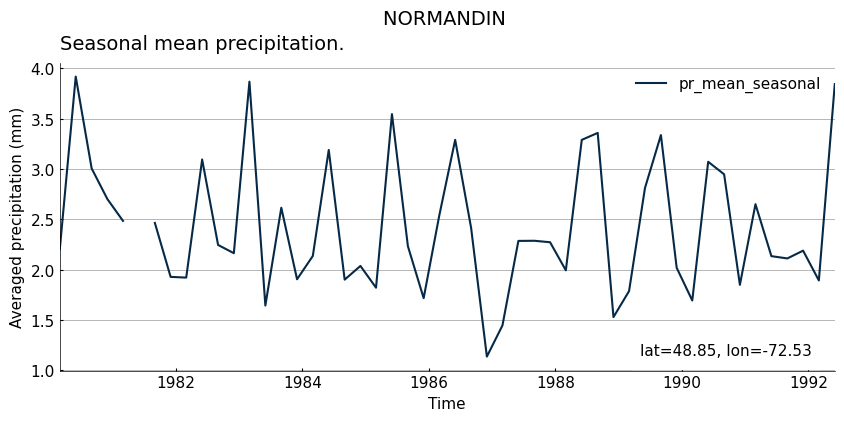

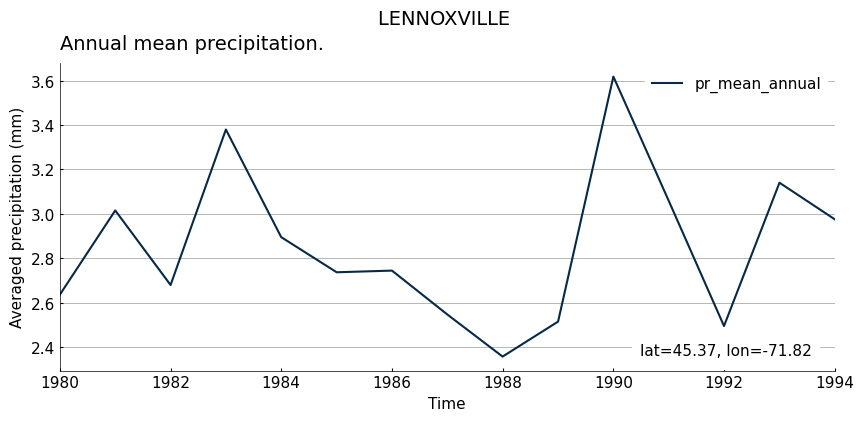

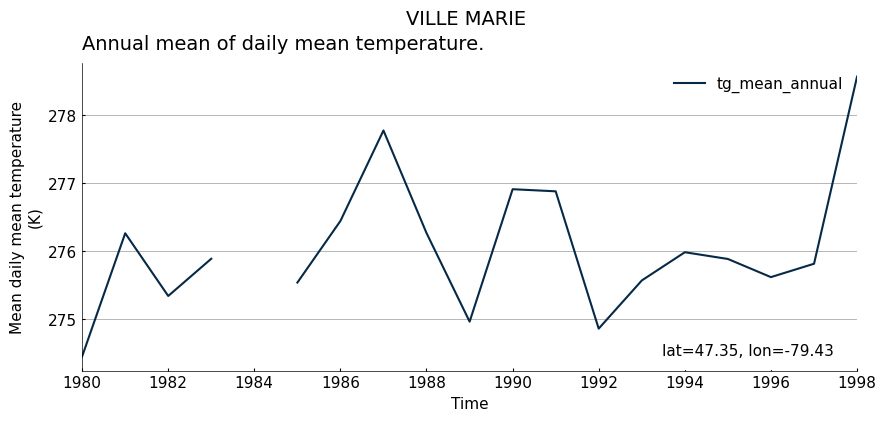

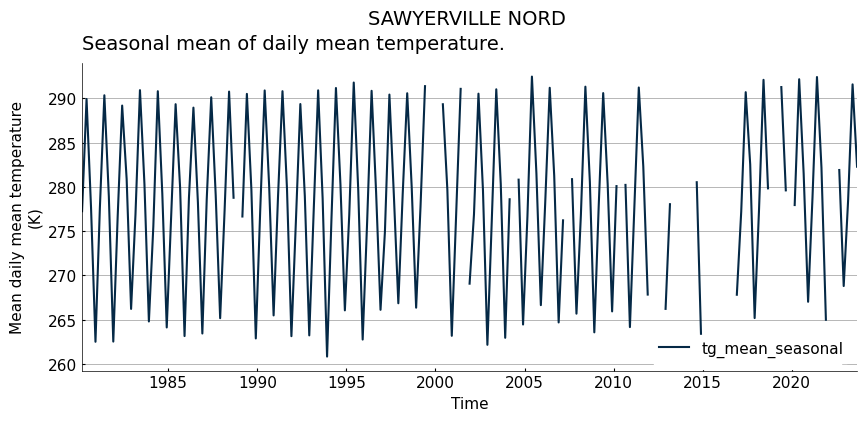

In [20]:
import random

for ds in dict_inds.values():
    # Get list of station indices
    n_stations = len(ds.station_name)
    station_idx = random.randint(0, n_stations - 1)

    # Select time series for that station
    da = ds.isel(station=station_idx)
    #da = ds.sel(station="ARMAGH")

    # Try to get the station name if available
    try:
        station_name = ds.station_name.values[station_idx]
    except (AttributeError, IndexError, KeyError):
        station_name = f"Station {station_idx}"

    # Plot time series
    ax = fg.timeseries(
        da,
        fig_kw={"figsize": (10, 4)},
        use_attrs={"suptitle": f"{station_name} — {list(ds.data_vars)[0]}"}
    )
    ax.set_title(f"{station_name} ", fontsize=14, y=1.08)
